# **MATERNAL HEALTH RISK**

Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [2]:
#Reading CSV file containing Maternal Health Risk data and storing it in DataFrame.
df = pd.read_csv("/content/Maternal Health Risk Data Set.csv")

In [3]:
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [4]:
#To find out the datatype of the 'RiskLevel' column.
df["RiskLevel"].dtype

dtype('O')

In [5]:
#Selecting rows where the 'Age' column contains missing values(NaN).
df[df["Age"].isna()]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel


There are No Null values in 'Age' column

In [7]:
#Counting the missing values (NaN) for each value of DataFrame.
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

There are No Null Values Present.

In [8]:
#Counting total number of rows in each column of DataFrame.

df.isnull().count()

Age            1014
SystolicBP     1014
DiastolicBP    1014
BS             1014
BodyTemp       1014
HeartRate      1014
RiskLevel      1014
dtype: int64

In [9]:
#Retriving dimensions of DataFrame.
df.shape

(1014, 7)

In [13]:
#Creating Descriptive statistics for Numerical columns in DataFrame.
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


Based on these statistics, we can infer the typical range and variability of these health parameters within the studied population.

In [16]:
# Random Sampling of DataFrame Rows
df.sample()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
839,28,85,60,9.0,101.0,86,mid risk


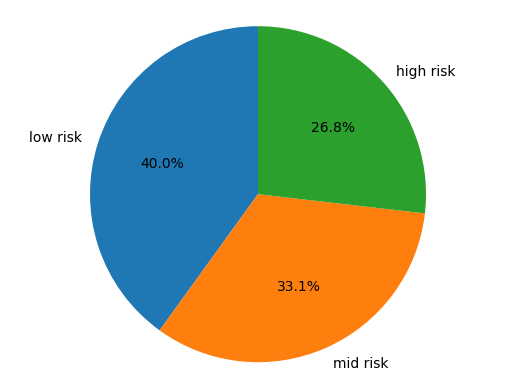

In [17]:
# Risk Level Distribution Pie Chart

# Calculate counts for each category
counts = df['RiskLevel'].value_counts()

# Create a pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the chart
plt.show()



The pie chart visually represents the distribution of risk levels within the dataset.

In [18]:
#Counting occurences of each unique value in the 'RiskLevel' column.
df["RiskLevel"].value_counts()

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64

<Axes: xlabel='RiskLevel', ylabel='HeartRate'>

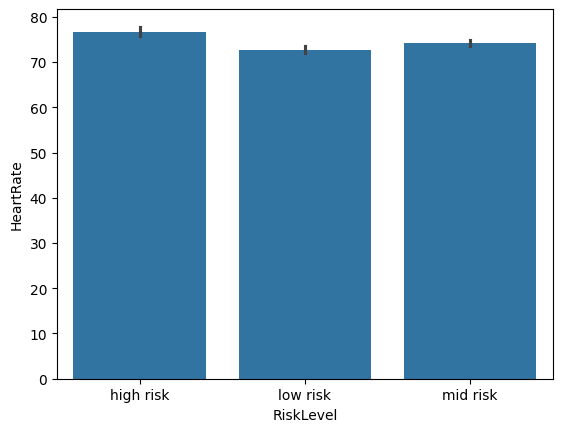

In [19]:
#Plotting a Barplot to visualise the relationship between 'RiskLevel' and 'HeartRate'
sns.barplot(x=df["RiskLevel"],y=df["HeartRate"])

The Bar plot suggests that Heart rates vary across different risk levels.

<Axes: xlabel='RiskLevel', ylabel='BS'>

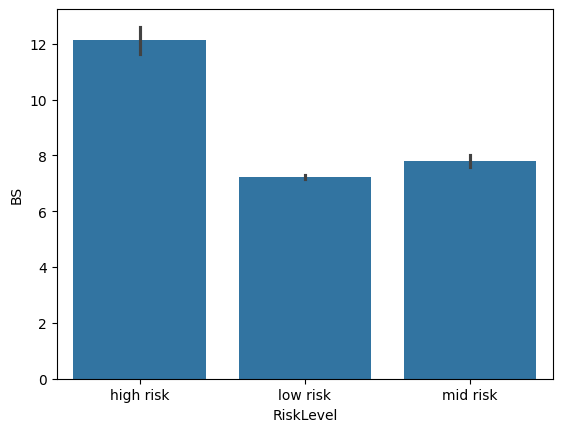

In [ ]:
#Plotting a Barplot to visualise the relationship between 'RiskLevel' and 'BS'
sns.barplot(x=df["RiskLevel"],y=df["BS"])

The Barplot suggests that blood sugar levels vary across different risk levels.

<Axes: xlabel='RiskLevel', ylabel='Age'>

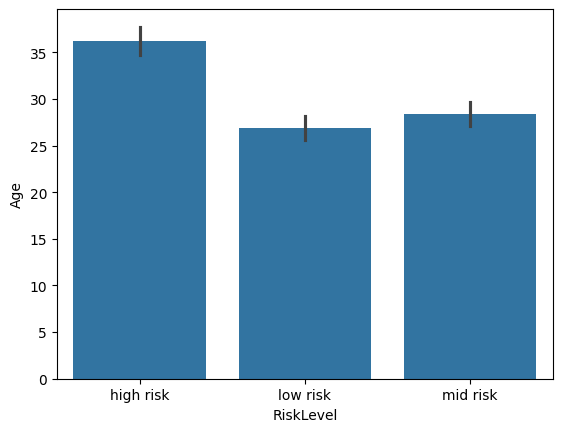

In [20]:
#Plotting a Barplot to visualise the relationship between 'RiskLevel' and 'Age'
sns.barplot(x=df["RiskLevel"],y=df["Age"])

RANDOM FOREST MODEL


In [30]:
# Step 1: Prepare the data
X = df.drop(columns=['RiskLevel'])  # Feature matrix
y = df['RiskLevel']  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = rf_model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.812807881773399


DECISION TREE MODEL

In [29]:
# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy*100}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 81.77339901477832
Confusion Matrix:
[[40  1  6]
 [ 5 62 13]
 [ 3  9 64]]
Classification Report:
              precision    recall  f1-score   support

   high risk       0.83      0.85      0.84        47
    low risk       0.86      0.78      0.82        80
    mid risk       0.77      0.84      0.81        76

    accuracy                           0.82       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.82      0.82       203

